# Классификация с помощью дерева решений
## Елисеев Е.В.

# Задание
1. Разработайте программу, которая выполняет классификацию заданного набора данных <br>
с помощью дерева решений. Параметрами программы являются набор данных, критерий выбора <br>
атрибута разбиения (Information gain, Gain ratio, Gini index).
2. Проведите эксперименты на наборе Census Income (данные о результатах переписи населения, <br>
в т.ч. о годовом доходе -- ниже или выше $50000: скачать обучающую выборку в формате CSV, <br>
тестовую выборку в формате CSV, скачать описание). В качестве обучающей выборки для <br>
построения дерева используйте 100% исходных данных.
3. Выполните визуализацию построенных деревьев решений.
4. Доработайте программу, добавив в список ее параметров долю, которую занимает <br>
обучающая выборка от общего размера набора данных, и обеспечив вычисление и выдачу <br>
в качестве результатов следующих показателей качества классификации: аккуратность (accuracy),<br>
 точность (precision), полнота (recall), F-мера.
5. Проведите эксперименты на наборе данных, фиксируя критерий выбора атрибута разбиения<br>
 и варьируя соотношение мощностей обучающей и тестовой выборок от 60%:40% до 90%:10% с шагом 10%.
6. Выполните визуализацию полученных результатов в виде следующих диаграмм:
- построенные деревья решений для заданного набора данных;
- показатели качества классификации в зависимости от соотношения мощностей обучающей <br>
и тестовой выборок для заданного набора данных.
7. Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. <br>
Отчет должен представлять собой связный и структурированный документ со следующими разделами:<br>
- формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др.
- сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.


In [1]:
import pandas as pd
import numpy as np 


# Получение данных
train = pd.read_csv('adult.data.csv', header=None)
test = pd.read_csv('adult.test.csv', header=None)
train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Форма данных
train.shape

(32561, 15)

In [3]:
column_names = {
    0: "age",
    1: "workclass",
    2: "fnlwgt",
    3: "education",
    4: "education-num",
    5: "marital-status",
    6: "occupation",
    7: "relationship",
    8: "race",
    9: "sex",
    10: "capital-gain",
    11: "capital-loss",
    12: "hours-per-week",
    13: "native-country",
    14: "income"
}

# Переименуем столбцы
train.rename(columns=column_names, inplace=True)
test.rename(columns=column_names, inplace=True)
train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# Текущее соотношение обучающей выборки ко всей
len(train) / (len(train) + len(test)) * 100

66.66598419393145

In [6]:
# Фиксим название столбца в test
test['income'] = test['income'].str.replace('.', '')

In [7]:
# Соединяем выборки
dataset = pd.concat([train, test])
del train
del test

dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
# Проверка на пустые значения
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

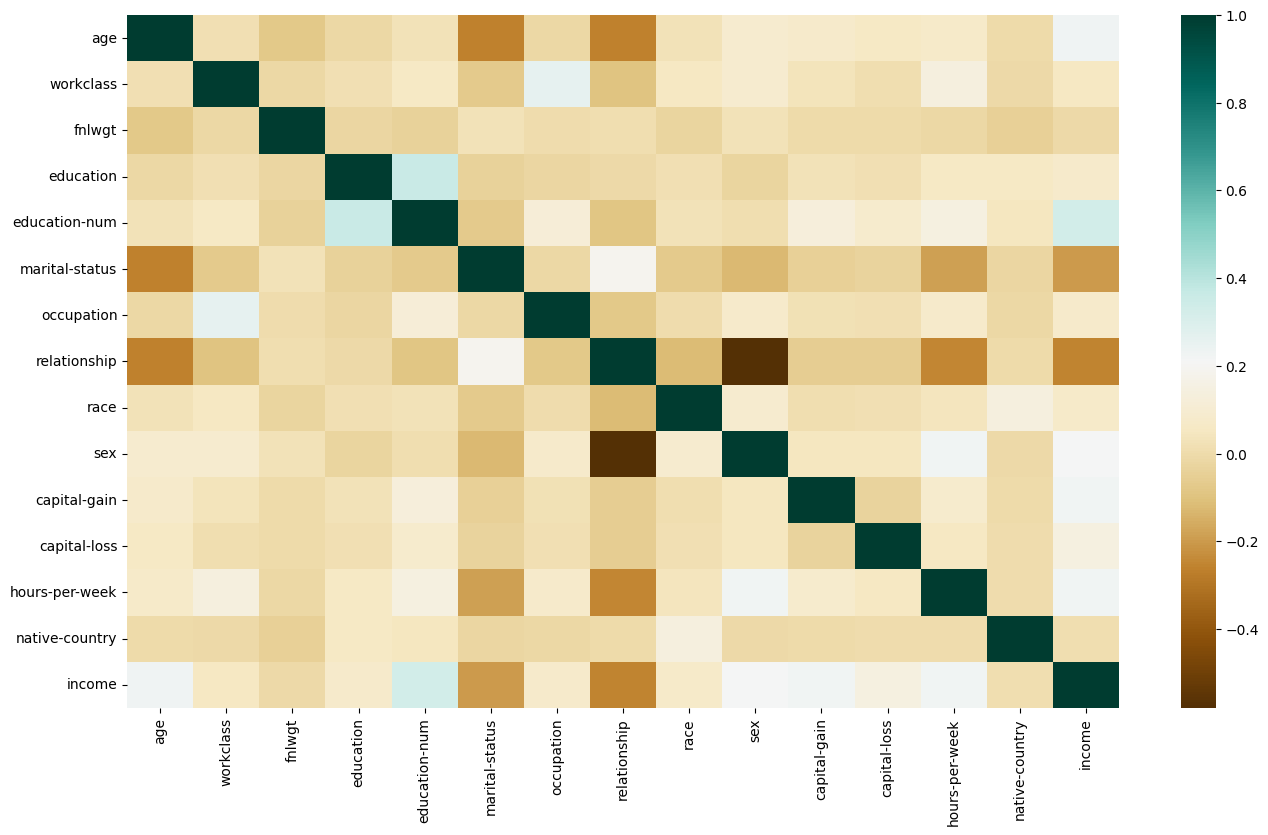

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Кодируем столбцы 
encoded_dataset = dataset.copy()
le = LabelEncoder()
for column in encoded_dataset.columns:
    if encoded_dataset[column].dtype == 'object':
        encoded_dataset[column] = le.fit_transform(encoded_dataset[column])

# Матрица корреляций
df_corr =  encoded_dataset.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool_), cmap = "BrBG",ax=ax)
plt.show()

In [10]:
# Убираем столбец sex т.к. он отрицательно коррелирует, а также имеет низкое влияние на обучение
dataset = dataset.drop(columns='sex')

In [11]:
# Число данных первого и второго класса
len(dataset[dataset['income'] == ' <=50K']), len(dataset[dataset['income'] == ' >50K'])

(37155, 11687)

In [12]:
# Применение 0versampling для балансировки недостающего класса
over_50k = dataset[dataset['income'] == ' >50K']
over_50k_duplicated = over_50k.sample(frac=2.0, replace=True, random_state=42)

# Объединение исходного DataFrame с дублированными строками
dataset_augmented = pd.concat([dataset, over_50k_duplicated])
dataset_augmented = dataset_augmented.sample(frac=1, random_state=42)
dataset_augmented.reset_index(drop=True, inplace=True)

len(dataset_augmented[dataset_augmented['income'] == ' <=50K']), len(dataset_augmented[dataset_augmented['income'] == ' >50K'])

(37155, 35061)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Функция классификации
def classify_with_dectree(data:pd.DataFrame, part_criterion: str, split=80, visualize: bool = False):
    # 'gini', 'entropy'
    
    # Разделение данных 
    train, test = train_test_split(data, train_size=split/100)
    train_x = train.drop(columns='income')
    train_y = train['income']
    test_x = test.drop(columns='income')
    test_y = test['income']
    
    # Кодирование признаков 
    le_x = LabelEncoder()
    for column in train_x.columns:
        if train_x[column].dtype == 'object':
            train_x[column] = le_x.fit_transform(train_x[column])

    for column in test_x.columns:
        if test_x[column].dtype == 'object':
            test_x[column] = le_x.fit_transform(test_x[column])

    le_y = LabelEncoder()
    encoded_train_y = le_y.fit_transform(train_y)
    encoded_test_y = le_y.transform(test_y)
    
    model = DecisionTreeClassifier(criterion=part_criterion, max_depth=30)
    model.fit(train_x, encoded_train_y) 
    
    y_pred = model.predict(test_x)
    acc = accuracy_score(encoded_test_y, y_pred)
    prec = precision_score(encoded_test_y, y_pred)
    rec = recall_score(encoded_test_y, y_pred)
    
    if visualize:
        plt.figure(figsize=(20,10))
        plot_tree(model, filled=True, feature_names=train_x.columns, class_names=['<=50k', '>50k'], proportion=True)
        plt.show()
    
    return acc, prec, rec

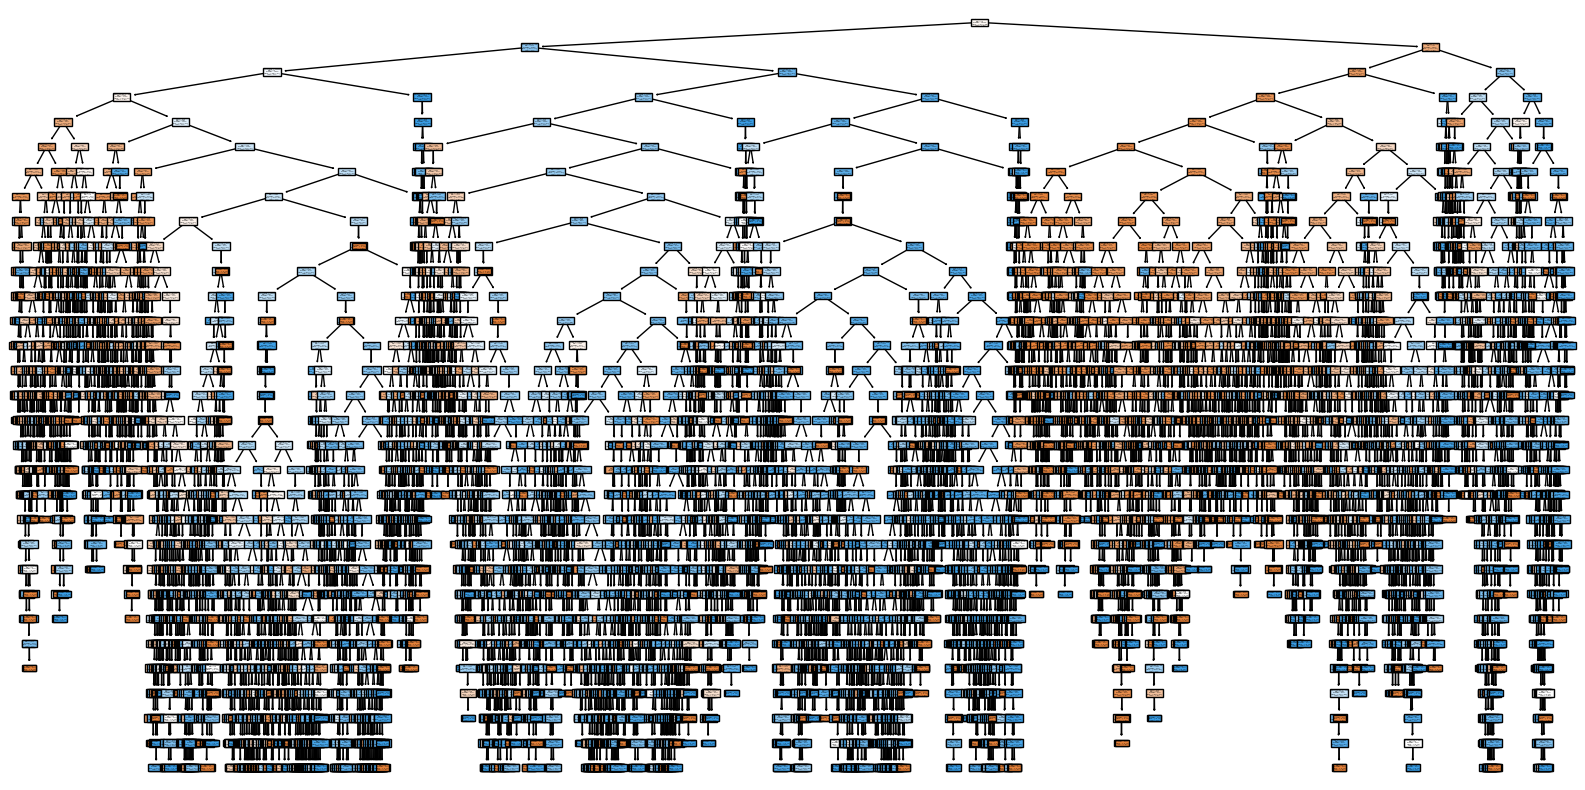

(0.9098587648850733, 0.8682021753039028, 0.961456709649993)

In [13]:
# Дерево с gini index, глубина 30
acc, prec, rec = classify_with_dectree(dataset_augmented, 'gini', 80, visualize=True)
acc, prec, rec

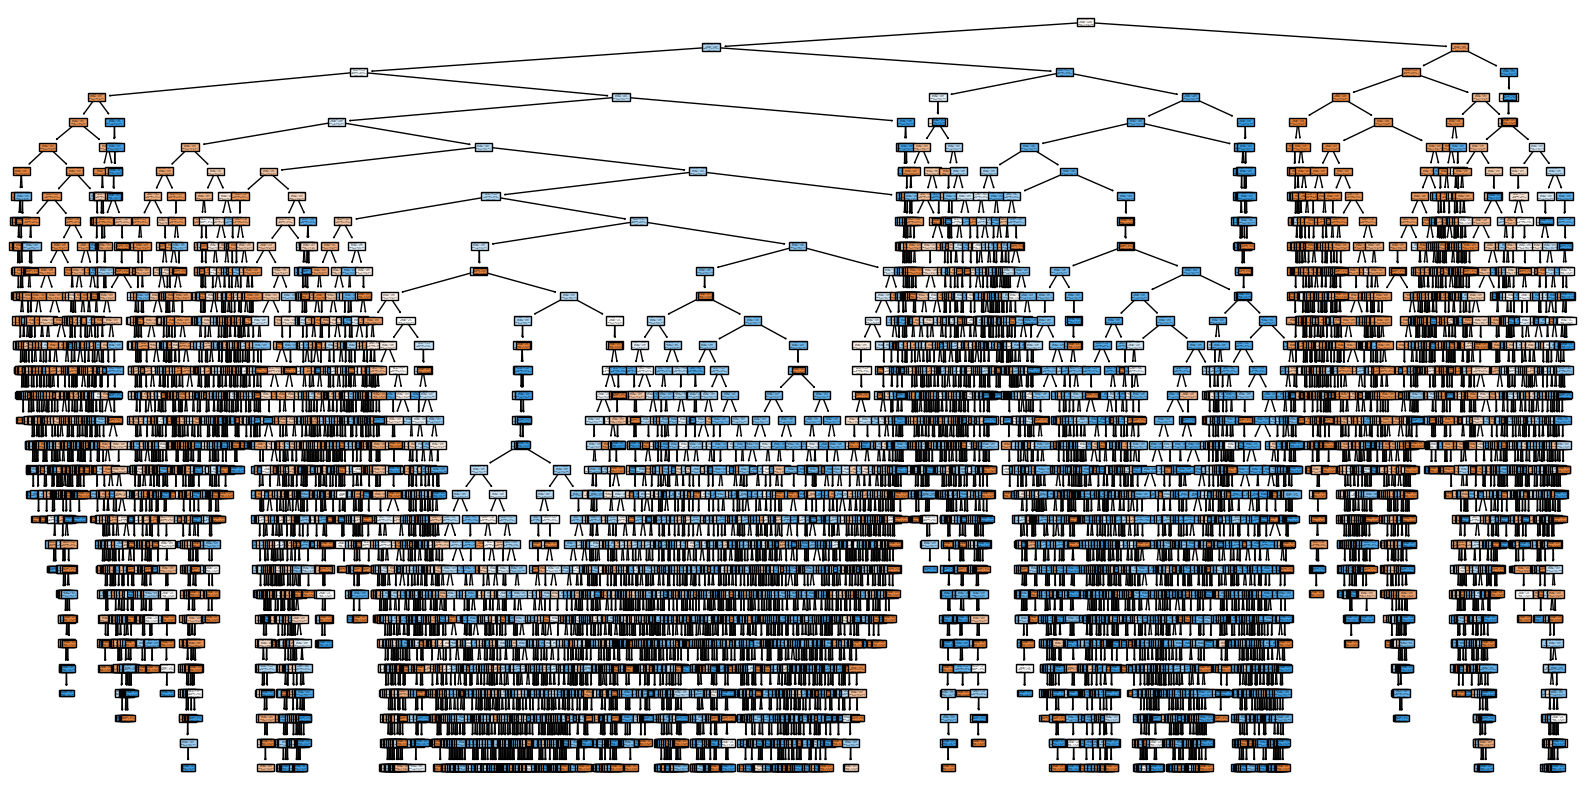

(0.8919966768208253, 0.8539545810493344, 0.9368556701030928)

In [14]:
# дерево с Information gain, глубина 30
acc, prec, rec = classify_with_dectree(dataset_augmented, 'entropy', 80, visualize=True)
acc, prec, rec

In [14]:
# Метрики дерева с обучащей выборкой 60
acc, prec, rec = classify_with_dectree(dataset_augmented, 'entropy', 60)
acc, prec, rec

(0.8801190847093848, 0.8411741835147745, 0.9276781247766741)

In [15]:
# Метрики дерева с обучащей выборкой 70
acc, prec, rec = classify_with_dectree(dataset_augmented, 'entropy', 70)
acc, prec, rec

(0.8896376644357258, 0.8465581553068837, 0.9450175073341535)

In [16]:
# Метрики дерева с обучащей выборкой 80
acc, prec, rec = classify_with_dectree(dataset_augmented, 'entropy', 80)
acc, prec, rec

(0.8985045693713652, 0.858171255367517, 0.9519473241804427)

In [26]:
# Метрики дерева с обучащей выборкой 90
acc, prec, rec = classify_with_dectree(dataset_augmented, 'entropy', 90)
acc, prec, rec

(0.90473553032401, 0.8555555555555555, 0.9668949771689498)

Из метрик можно увидеть, что при увеличении обучающей выборки, acc и rec растут, 
prec практически не изменяется

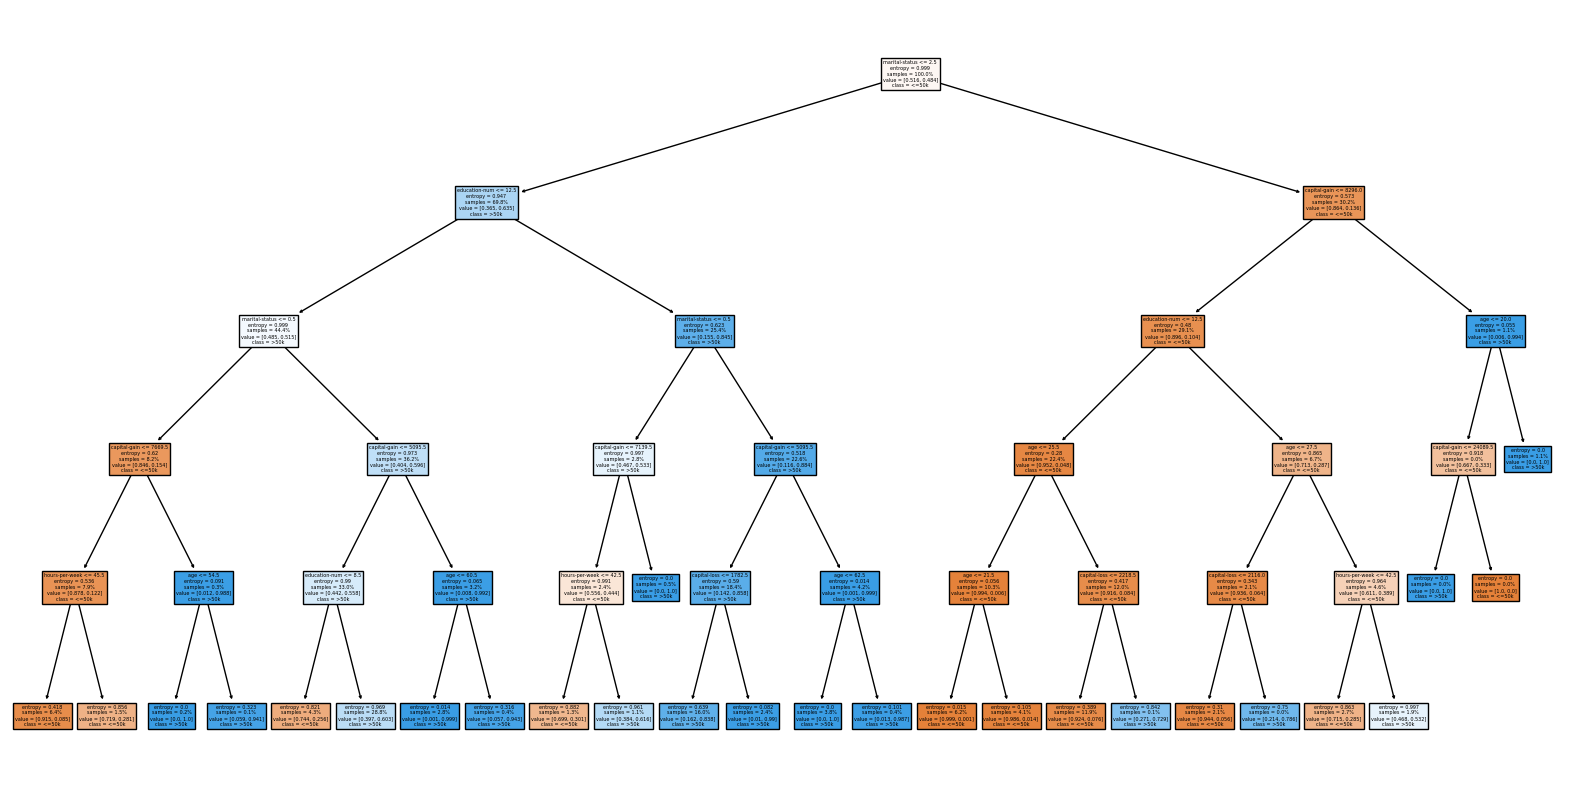

(0.8042093602880088, 0.7451839889260584, 0.9125582709422235)

In [20]:
# Визулизация дерева глубиной 5
acc, prec, rec = classify_with_dectree(dataset_augmented, 'entropy', 80, visualize=True)

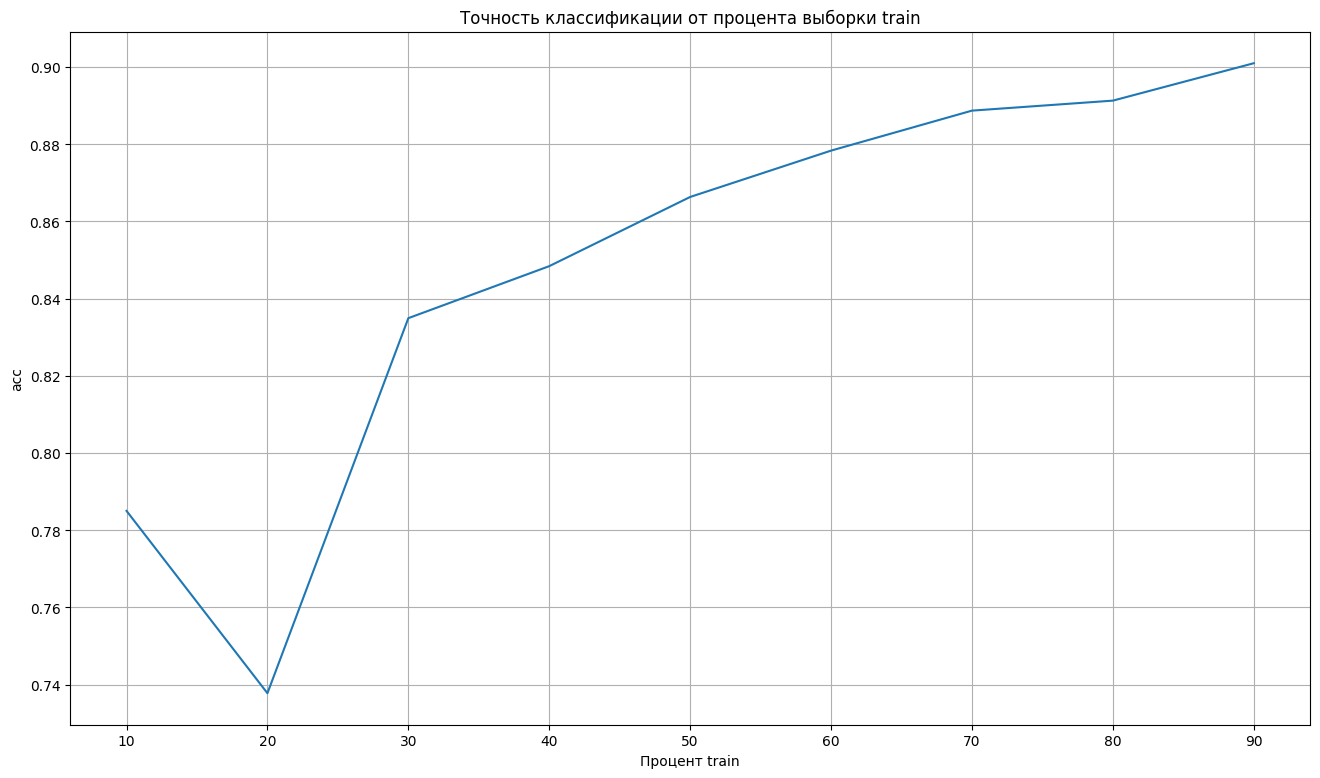

(0.9009969537524232, 0.8533266129032258, 0.962205171923842)

In [33]:
# Визулизация выбранной метрики от процента выборки train
def visualize_train_sample_by_metric(data: pd.DataFrame, metric:str = 'acc'):
    index_metric = {'acc': 0,
                    'prec' : 1,
                    'rec': 2}
    metrics = []
    all_metrics = []
    samples = [x*10 for x in range(1, 10)]
    
    cur_metric_id = index_metric[metric]
    for train_percent in samples:
        cur_metics = (classify_with_dectree(data, 'entropy', train_percent))
        metrics.append(cur_metics[cur_metric_id])

    plt.figure(figsize=(16, 9))
    plt.plot(samples, metrics)
    plt.title('Точность классификации от процента выборки train')
    plt.ylabel(metric)
    plt.xlabel('Процент train')
    plt.grid(True)
    plt.show()
    return cur_metics


visualize_train_sample_by_metric(dataset_augmented, 'acc')

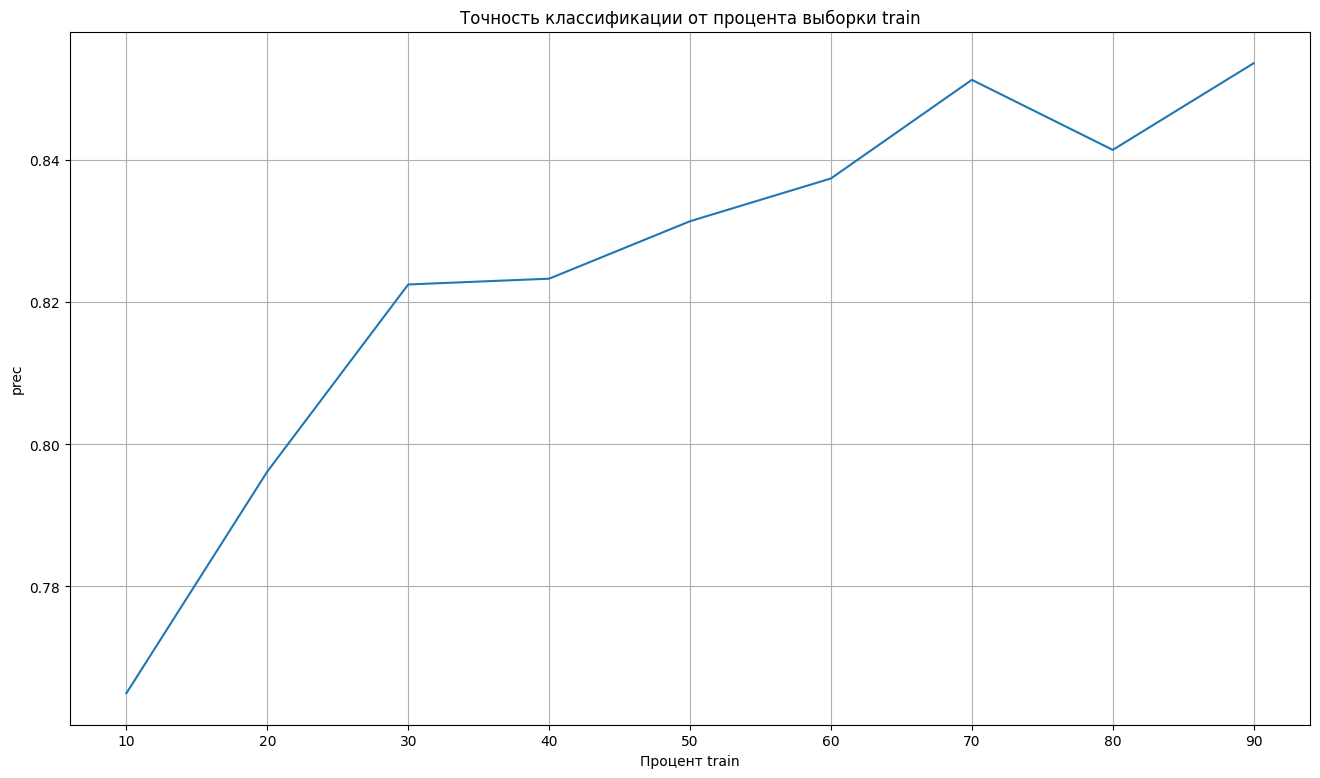

In [29]:
visualize_train_sample_by_metric(dataset_augmented, 'prec')

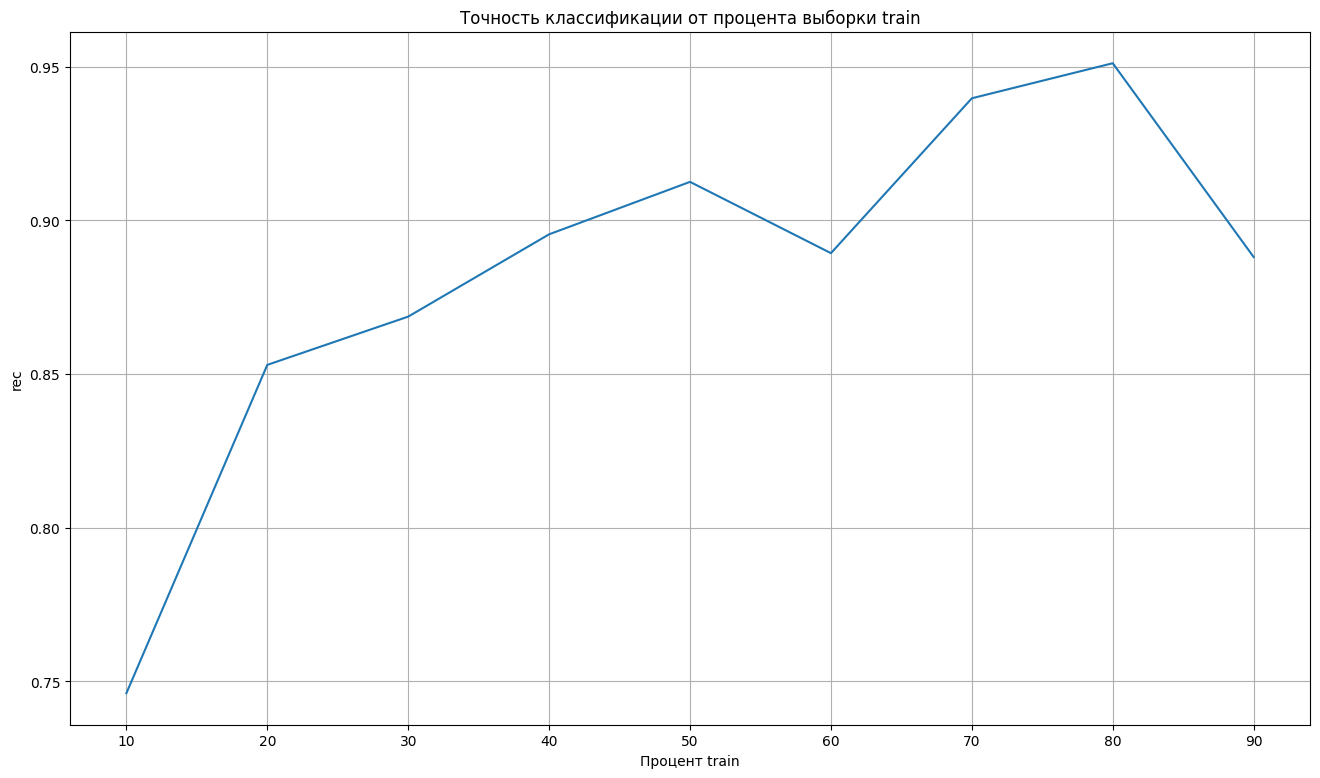

In [31]:
visualize_train_sample_by_metric(dataset_augmented, 'rec')

На данных графиках видно, что при увеличении процента обучающей выборки все графики практически всегда растут <br>
Однако, при приближении к значению 70 рост метрик замедляется, а на значении 90 начинает падать acc и prec, <br>
что может говорить о том, что тестовая выборка слишком мала по сравнению с тренировочной